# Common tools for challenges
- EDA
- Graphs
- Custom functions
- Feature selection
- Dimensionality reduction
- Model evaluation frameworks
- etc

### Basic imports

In [133]:
# never leave home w/o em
import pandas as pd
import numpy as np

# model evaluation
import itertools
from sklearn import metrics, cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

# general plotting
import seaborn as sns
sns.set(context='paper', font='fantasy')
import matplotlib.pyplot as plt
%matplotlib inline

# proof of concept and datasets
from sklearn import datasets
from sklearn.datasets import make_classification
X, y = make_classification()

### EDA type stuff

In [19]:
boston_sk = datasets.load_boston()
boston = pd.DataFrame(
    data=boston_sk.data,
    columns=boston_sk.feature_names
)
boston['target'] = boston_sk.target

In [20]:
# sample is a nice drop in replacement for head / tail
boston.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
465,3.16360,0.0,18.10,0.0,0.655,5.759,48.2,3.0665,24.0,666.0,20.2,334.40,14.13,19.9
293,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
217,0.07013,0.0,13.89,0.0,0.550,6.642,85.1,3.4211,5.0,276.0,16.4,392.78,9.69,28.7
472,3.56868,0.0,18.10,0.0,0.580,6.437,75.0,2.8965,24.0,666.0,20.2,393.37,14.36,23.2
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
167,1.80028,0.0,19.58,0.0,0.605,5.877,79.2,2.4259,5.0,403.0,14.7,227.61,12.14,23.8


In [22]:
# quick summary stats
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
# check data types, missing values, memory footprint
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


### Graphing

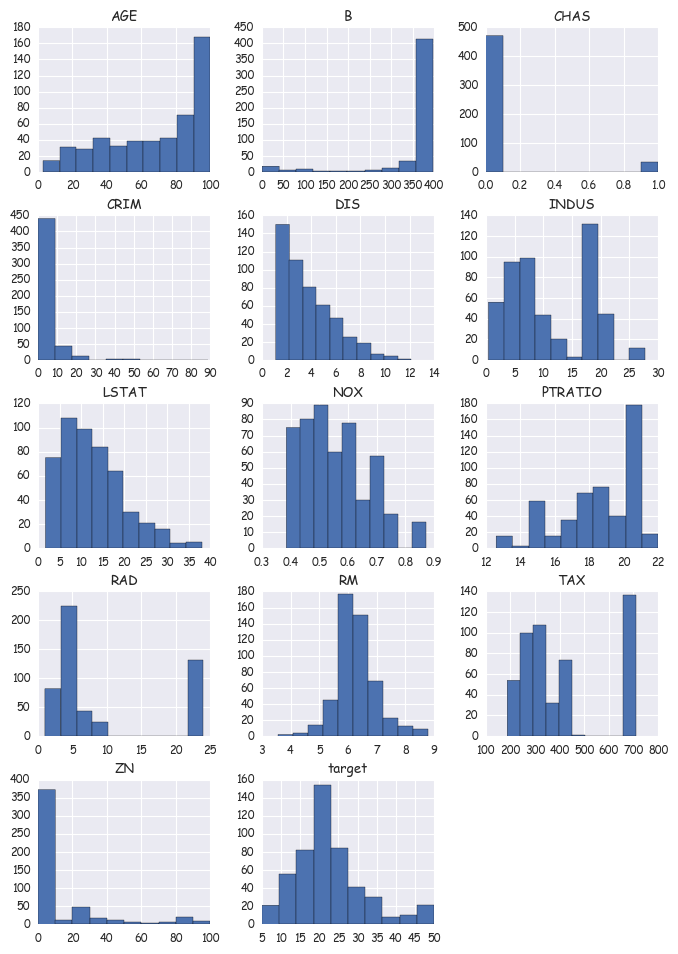

In [59]:
# built in pandas plotting
boston.hist(layout=(6,3), figsize=(8,14));

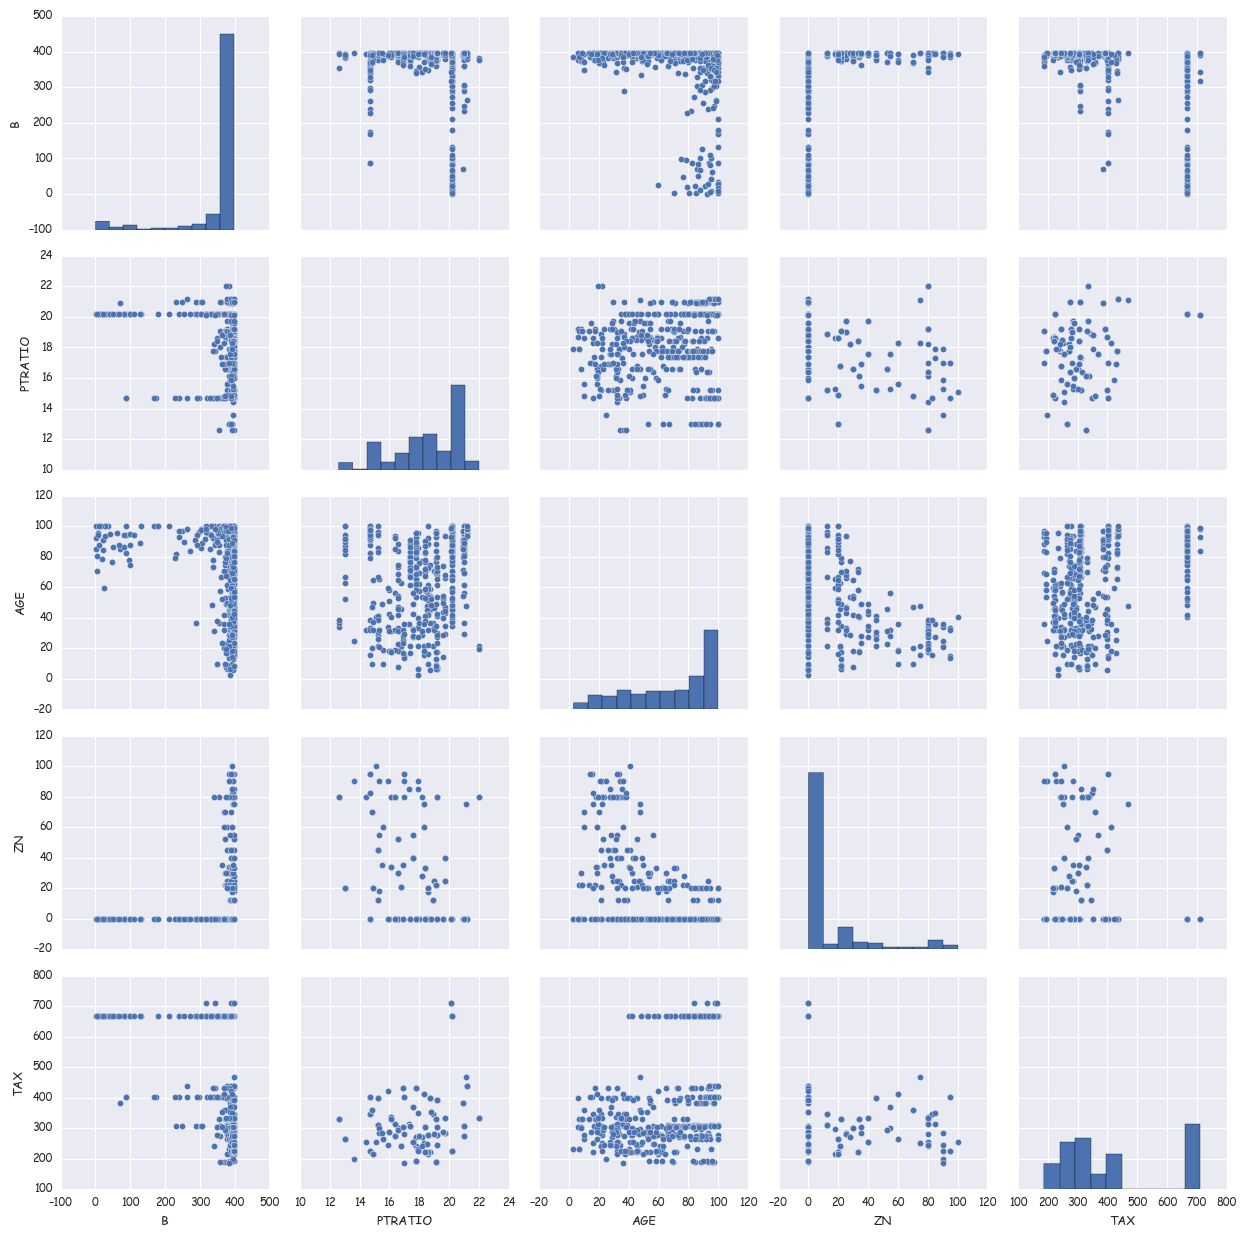

In [72]:
# if dimensionality is low a correlation plot can be used
sns.pairplot(boston.sample(n=5, axis=1));

In [68]:
# if dimensionality is high, just print the top correlated features
def get_redundant_pairs(df):
    '''Return diagonal and lower triangular portions of corr matrix
    '''
    pairs_to_drop = {(df.columns[i], df.columns[j])
                     for i in range(df.shape[1])
                     for j in range(i+1)}
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

get_top_abs_correlations(boston)

RAD    TAX       0.910228
NOX    DIS       0.769230
INDUS  NOX       0.763651
AGE    DIS       0.747881
LSTAT  target    0.737663
dtype: float64

#### Dimensionality Reduction
- low variance
- statistical tests
- using feature importances from model
- PCA / SVD / Manifold / LDA

In [191]:
# remove low variance features

from sklearn.feature_selection import VarianceThreshold

def var_threshold_improved(data_frame, threshold=0):
    '''Sklearn behaves strangely with pandas occasionally, in this case
    a numpy array is returned instead of the dataframe. In this function,
    we identify the columns to be removed from sklearn's VarianceThreshold
    and remove them within pandas. Default threshold is any 0 variance
    variable will be removed but this can also be supplied. Take care to 
    normalize features or at least have a good idea of each variable's 
    distribution prior to supplying the variance threshold
    '''
    n_features_originally = data_frame.shape[1]
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(data_frame)
    
    # Get the indices of low variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    
    # Delete features below the threshold
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    # Print info
    n_features_deleted = feat_ix_delete.size
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (n_features_deleted) / n_features_originally))
    return data_frame

temp = var_threshold_improved(boston, 0.5)

  - Deleted 3 / 14 features (~= 21.4 %)


In [204]:
# univariate feature selection using statistical tests
#  regression: f_regression, mutual_info_regression
#  classification: chi2, f_classif (f-test), mutual_info_classif
#  careful with tests, f-test is powerful but only captures linear 
#    dependencies, mutual info will catpure any dependency between vars

from sklearn.feature_selection import SelectKBest, chi2

def select_k_best_improved(X, y, scoring, k=2):
    '''Return the k best features according to scoring test statistic. 
    This should be updated to have the option to print the feature ranking
    in likely a series object.
    '''
    sel = SelectKBest(scoring, k=k)
    df_new = sel.fit_transform(X, y)
    n_features_deleted = X.shape[1] - df_new.shape[1]
    n_features_originally = X.shape[1]
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (n_features_deleted) / n_features_originally))
    return df_new

X = boston.drop('target', axis=1)
y = [0 if tar < 30 else 1 for tar in boston.target]

temp = select_k_best_improved(X, y, chi2, 5)

  - Deleted 8 / 13 features (~= 61.5 %)


In [ ]:
# Principal Component Analysis - SVD based projection
from sklearn.decomposition import PCA
X_new = PCA(n_components=5).fit(X)

# Factor Analysis - data is assumed to be generated by a mix of lower 
#   dimension laten factors and gaussian noise. Factors are distributed
#   according to a gaussian with zero mean and unit covariance.
from sklearn.decomposition import FactorAnalysis
X_new = FactorAnalysis(n_components=5)

# Independent Component Analysis - not really for dimensionality reduction,
#   ICA attempts to separate a multivariate signal into additive sub 
#   components that are maximally independent. ICA does not have a noise
#   term so you must whiten!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X) # Reconstructed signals
A_ = ica.mixing_ # mixing matrix

# Dictionary Learning - find a dictionary (set of primatives) that can
#   best represent the data using a sparse code. 
from sklearn.decomposition import DictionaryLearning
dico = DictionaryLearning(n_components=10)
V = dico.fit(X).components_ # learned primatives

# Latent Dirichlet Allocation - commonly used for understanding documents
#   as a mixture of topics that spit out words with certain probabilities.
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=5)
lda.fit(X, y)
X_lda = lda.transform(X)

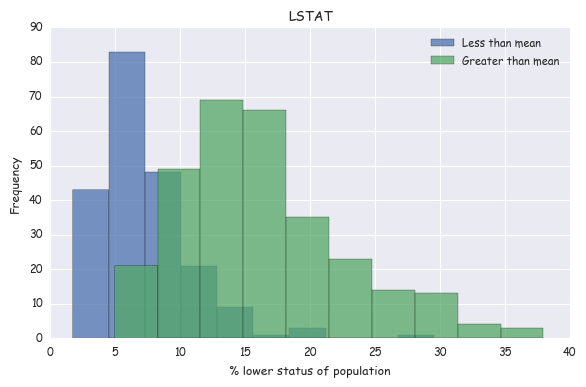

In [91]:
# overlapping 2 histograms on the same plot
target_mean = np.mean(boston.target)

above_target_mean = boston[boston.target < target_mean]
below_target_mean = boston[boston.target > target_mean]

fig, axs = plt.subplots()

axs.hist(below_target_mean.LSTAT, label='Less than mean', alpha=0.75);
axs.hist(above_target_mean.LSTAT, label='Greater than mean', alpha=0.75);

axs.legend();
axs.set_title('LSTAT')
axs.set_xlabel('% lower status of population')
axs.set_ylabel('Frequency')
plt.tight_layout()

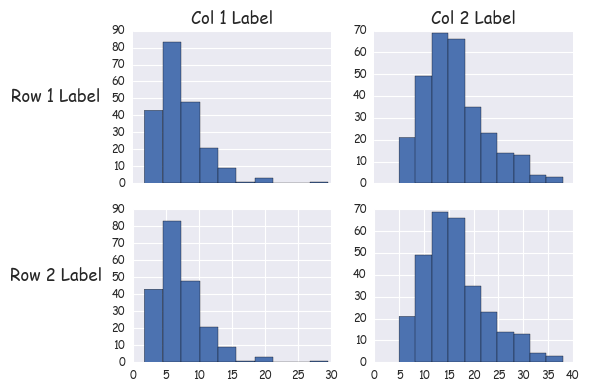

In [117]:
# 4 figures in a window arrangement
fig = plt.figure()

ax1 = fig.add_subplot(221)
below_target_mean.LSTAT.hist()
ax1.set_ylabel('Row 1 Label', rotation=0, size='large')
ax1.set_title('Col 1 Label', rotation=0, size='large')
ax1.title.labelpad = 20
ax1.yaxis.labelpad = 40
ax1.xaxis.set_visible(False)

ax2 = fig.add_subplot(222)
above_target_mean.LSTAT.hist()
ax2.set_title('Col 2 Label', rotation=0, size='large')
ax2.title.labelpad = 20
ax2.xaxis.set_visible(False)

ax3 = fig.add_subplot(223)
below_target_mean.LSTAT.hist()
ax3.set_ylabel('Row 2 Label', rotation=0, size='large')
ax3.yaxis.labelpad = 40

ax4 = fig.add_subplot(224)
above_target_mean.LSTAT.hist()

plt.tight_layout()

### Modeling

In [166]:
np.set_printoptions(precision=2)

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Normalized confusion matrix',
                          cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def evaluate(model, X, y, params, classes=['0','1'], scoring='roc_auc'):
    '''Grid search for optimal paramaterization and return optimal
    estimator
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    grid = GridSearchCV(model, params, scoring=scoring, cv=5)
    grid.fit(X_train, y_train)
    
    y_ = grid.best_estimator_.predict(X_test)
    
    print(grid.best_estimator_.get_params)
    print('\nAccuracy: {}'.format(
            np.round(metrics.accuracy_score(y_test, y_),3)))
    print('AUC: {}\n'.format(
            np.round(metrics.roc_auc_score(y_test, y_),3)))
    
    cnf_matrix = confusion_matrix(y_test, y_)
    
    plot_confusion_matrix(cnf_matrix, classes=classes)
    
    return grid.best_estimator_

#### Toy example on cooked up data

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)>

Accuracy: 0.825
AUC: 0.824



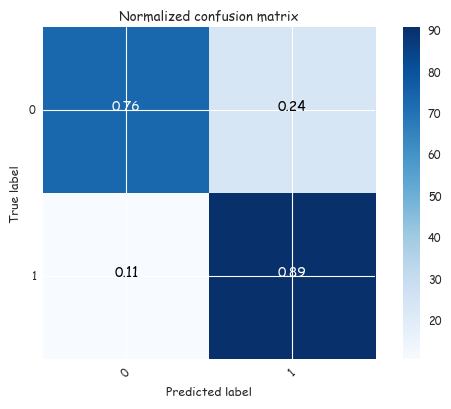

In [167]:
# use https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#   for tuning xgboost
from xgboost import XGBClassifier

X, y = make_classification(
        n_samples=1000,
        n_features=50,
        n_informative=20,
        n_classes=2
        )

# just a few params swept here for illustration
params = {
    'n_estimators': [100,150],
    'max_depth': [5,7]
}

xgb = evaluate(XGBClassifier(), X, y, params, scoring='accuracy')

### Common models - Classification

In [ ]:
# Logistic Regression - this tends to be my first model and baseline for
#   the majority of my experiments. It's highly interpretable and can do
#   very well with enough feature engineering. Low variance but high bias.
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

# CART Algorithms - seriously, don't fk with anything other than XGBoost.
#   It's just so powerful. Gradient Boosted Machines built on decision 
#   trees. It's outside of sklearn but has a similar API. It's highly
#   productionized and support so it's very fast. The joke within the 
#   Kaggle community is that if your problem is nlp, image or video 
#   use deep learning, otherwise use XGBoost. Unfortunately it's not as
#   interpretable so if need to explain what you've done to non-tech people
#   this "may" not be a good choice.
from xgboost import XGBClassifier
xgb = XGBClassifier()

# SVM - Eh, it performs similarly to Logistic Regression from what I've seen
#   I'd rather just pick LR and be able to explain things than use SVM and
#   eek out a small improvement (if at all). If you find LR does poorly, it
#   may be because your data is not linearly serparable you can try 
#   SVM with a non-linear kernel (rbf). It will be more robust to outliers 
#   as well. It does have a nice regression form as well.
from sklearn.svm import SVC
svm = SVC()

# General SGD Classifier - SVM / LR / etc with SGD training
from sklearn.linear_model import SGDClassifier()
sgdc = SGDClassifier()

### Common Models - Regression

In [ ]:
# Ordinary Least Squares  - min_w ||Xw -y||_2^2
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

# Lasso - sparse solutions, min_w ||Xw -y||_2^2 + a||w||_1^2
from sklearn.linear_model import Lasso
lasso = Lasso()

# Ridge - OLS with penalty on solution size, 
#   min_w ||Xw -y||_2^2 + a||w||_2^2, large a -> more robust to
#   collinearity
from sklearn.linear_model import Ridge
rdg = Ridge()

# Elastic Net - mix between Lasso and Ridge, good for when there are 
#   multiple features that are correlated with one another. Maybe it's
#   better just to do feature selection prior to training.
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# General SGD Regressor - linear model with SGD training
from sklearn.linear_model import SGDRegressor()
sgdr = SGDRegressor()